In [1]:
#data manipulation libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#logging
import logging
logging.basicConfig(level=logging.INFO,
filemode='w',
format='%(asctime)s %(levelname)s %(message)s')

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
url='https://raw.githubusercontent.com/Frisk516/Stroke_prediction_MLModel/refs/heads/main/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(url,sep=',')
df.sample(frac=1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4854,8838,Female,36.00,0,0,No,Private,Rural,66.55,32.8,smokes,0
1054,4842,Female,76.00,0,0,No,Self-employed,Urban,77.52,40.9,formerly smoked,0
3034,72348,Female,22.00,0,0,No,Private,Urban,64.87,20.6,Unknown,0
1957,16061,Female,1.56,0,0,No,children,Urban,113.40,19.5,Unknown,0
1238,5447,Female,21.00,0,0,No,Private,Rural,112.38,25.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,45535,Male,68.00,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1
3333,59872,Female,38.00,0,0,Yes,Private,Rural,80.82,49.3,never smoked,0
2716,46256,Male,15.00,0,0,No,Private,Urban,77.55,24.8,Unknown,0
2194,49970,Male,1.72,0,0,No,children,Rural,127.29,18.5,Unknown,0


In [3]:
#dividing the data into numerical and categorical
numerical_data=df.select_dtypes(exclude='object')
categorical_data=df.select_dtypes(include='object')

In [4]:
#checking for null
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#imputing the missing values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
#performing EDA
from collections import OrderedDict
stats=[]
for i in numerical_data:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'mode':df[i].mode()[0],
        'std':df[i].std(),
        'min':df[i].min(),
        'max':df[i].max(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)


# Outlier Identification :
outlier_label = []
for col in report['feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,feature,mean,median,mode,std,min,max,skewness,kurtosis,Outlier Comment
0,id,36517.829354,36932.000,67.000000,21161.721625,67.00,72940.00,-0.019913,-1.212368,No Outliers
1,age,43.226614,45.000,78.000000,22.612647,0.08,82.00,-0.137059,-0.991010,No Outliers
2,hypertension,0.097456,0.000,0.000000,0.296607,0.00,1.00,2.715392,5.375456,Has Outliers
3,heart_disease,0.054012,0.000,0.000000,0.226063,0.00,1.00,3.947244,13.586052,Has Outliers
4,avg_glucose_level,106.147677,91.885,93.880000,45.283560,55.12,271.74,1.572284,1.680479,Has Outliers
5,bmi,28.893237,28.400,28.893237,7.698018,10.30,97.60,1.076716,3.623061,Has Outliers
6,stroke,0.048728,0.000,0.000000,0.215320,0.00,1.00,4.193284,15.589736,Has Outliers


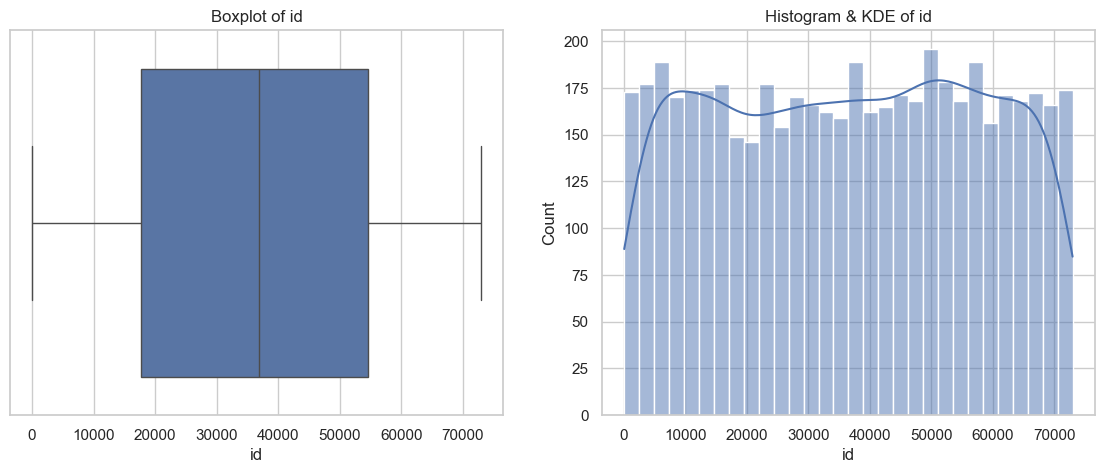

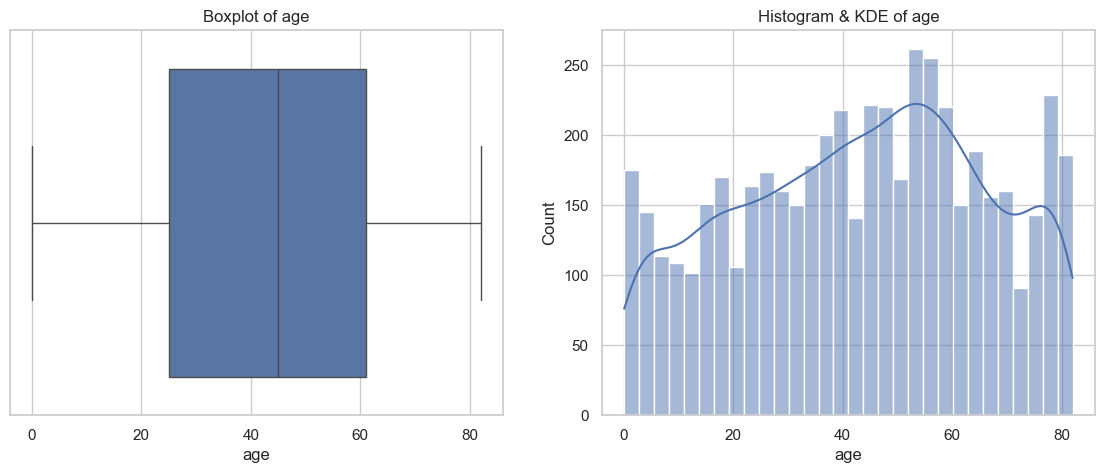

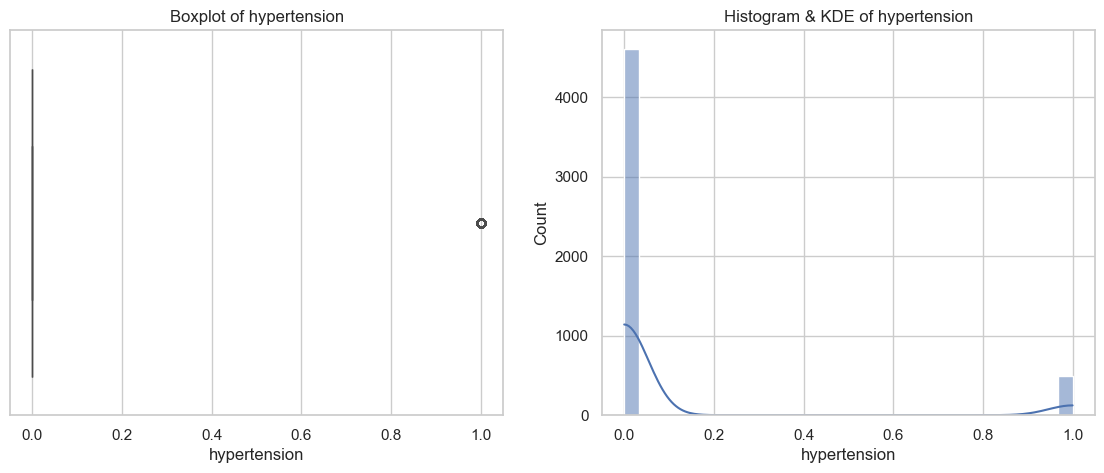

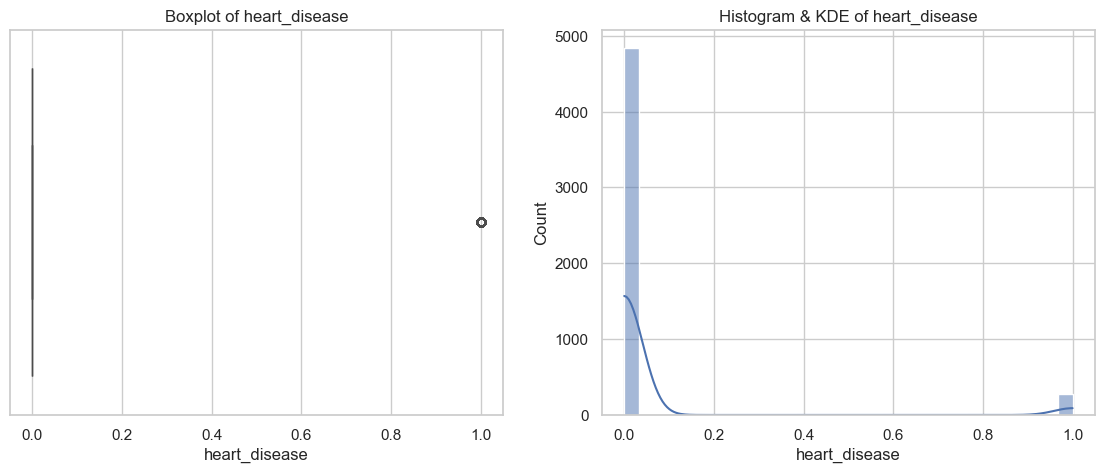

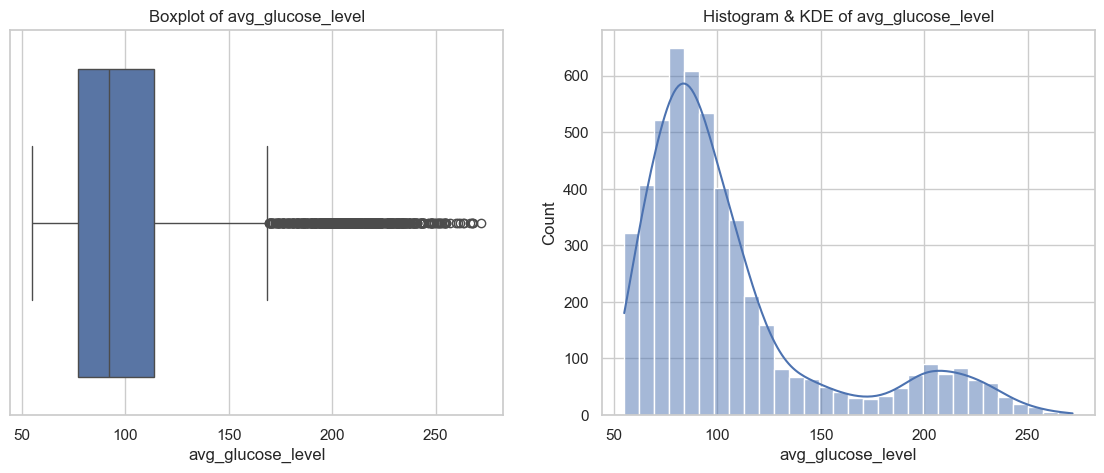

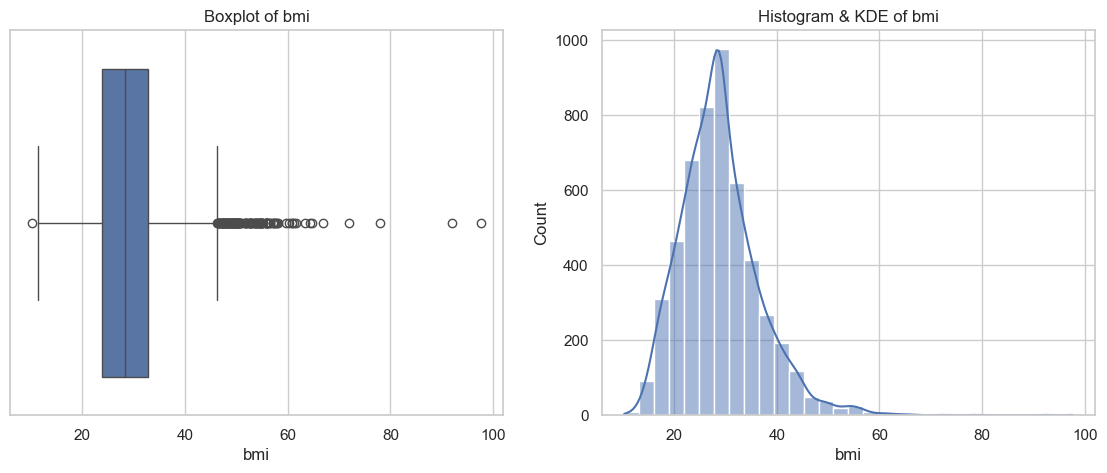

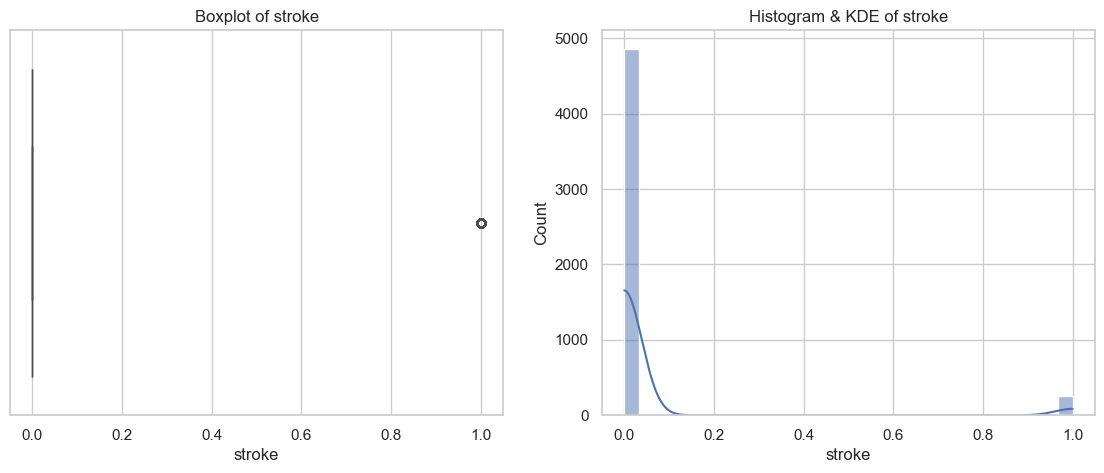

In [8]:
#checking outliers
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in numerical_data.columns:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [9]:
#the dataset has a considerable number of outliers
logging.info("The dataset has a considerable number of outliers")

2025-10-19 17:02:17,040 INFO The dataset has a considerable number of outliers


In [16]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [17]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [22]:
#splitting data
X=df.drop(columns='stroke')
y=df['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

df['stroke'].value_counts()
#imbalanced dataset

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train



array([[-0.09400718,  1.        , -0.13888889, ...,  0.00480641,
         1.6043956 ,  0.        ],
       [-0.68897223,  0.        ,  0.41666667, ...,  3.80987984,
         2.57142857,  0.        ],
       [-0.50068805,  0.        , -0.69444444, ..., -0.01201602,
         1.21978022, -1.        ],
       ...,
       [-0.37376218,  1.        ,  0.58333333, ...,  0.35967957,
        -0.05494505, -1.        ],
       [-0.80351313,  0.        , -0.66666667, ...,  0.53244326,
        -0.59340659,  0.        ],
       [ 0.64725722,  1.        , -0.13888889, ..., -0.92817089,
         1.47252747, -0.5       ]])

In [23]:
#balancing target column with SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
y_train.value_counts()

stroke
0    3409
1    3409
Name: count, dtype: int64

In [24]:
#using logistic regression since the dataset is binary
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#using metrics to evaluate model performance
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR=accuracy_score(y_test,y_pred)

print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1452
           1       0.14      0.77      0.23        81

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.80      1533

